In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
data = pd.read_csv("Labelled  Tweets.csv")
data.head()

,Class,Tweets
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [45]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   2
Count of rows in the data is:   24783


In [46]:
data['Class'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Class', ylabel='count'>

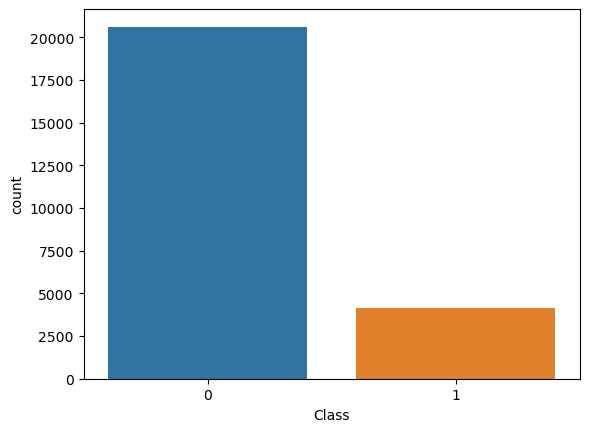

In [47]:
sns.countplot(x='Class', data=data)

## Data Preprocessing 

In [48]:
data['Tweets']=data['Tweets'].str.lower()
data['Tweets'].tail()

24778    you's a muthaf***in lie &#8220;@lifeasking: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like i ain...
24781                youu got wild bitches tellin you lies
24782    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: Tweets, dtype: object

In [49]:
stopword = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [50]:
STOPWORDS = set(stopword)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['Tweets'] = data['Tweets'].apply(lambda text: cleaning_stopwords(text))
data['Tweets'].head(20)

0     !!! rt @mayasolovely: woman shouldn't complain...
1     !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2     !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3     !!!!!!!!! rt @c_g_anderson: @viva_based look l...
4     !!!!!!!!!!!!! rt @shenikaroberts: shit hear mi...
5     !!!!!!!!!!!!!!!!!!"@t_madison_x: shit blows me...
6     !!!!!!"@__brighterdays: not sit hate another b...
7     !!!!&#8220;@selfiequeenbri: cause i'm tired bi...
8     " &amp; might not get ya bitch back &amp; thats "
9     " @rhythmixx_ :hobbies include: fighting maria...
10    " keeks bitch curves everyone " lol walked con...
11                       " murda gang bitch gang land "
12                " hoes smoke losers ? " yea ... go ig
13                           " bad bitches thing like "
14                                    " bitch get off "
15                                 " bitch nigga miss "
16                               " bitch plz whatever "
17                                       " bitch

In [51]:
def remove_usernames(text):
    return re.sub(r'^[^:;]+[:;]', '', text)
data['Tweets'] = data['Tweets'].apply(remove_usernames)


In [52]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['Tweets']= data['Tweets'].apply(lambda x: cleaning_punctuations(x))
data['Tweets'].head(20)

0      woman shouldnt complain cleaning house amp ma...
1      boy dats coldtyga dwn bad cuffin dat hoe 1st ...
2               ever fuck bitch start cry confused shit
3                            vivabased look like tranny
4      shit hear might true might faker bitch told y...
5      shit blows meclaim faithful somebody but stil...
6      not sit hate another bitch  got much shit goi...
7     selfiequeenbri cause im tired big bitches comi...
8                might not get ya bitch back amp thats 
9                 hobbies include fighting mariam bitch
10     keeks bitch curves everyone  lol walked conve...
11                          murda gang bitch gang land 
12                       hoes smoke losers   yea  go ig
13                              bad bitches thing like 
14                                       bitch get off 
15                                    bitch nigga miss 
16                                  bitch plz whatever 
17                                          bitc

In [53]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['Tweets'] = data['Tweets'].apply(lambda x: cleaning_repeating_char(x))
data['Tweets'].head()

0     woman shouldnt complain cleaning house amp ma...
1     boy dats coldtyga dwn bad cuffin dat hoe1st p...
2              ever fuck bitch start cry confused shit
3                           vivabased look like tranny
4     shit hear might true might faker bitch told y...
Name: Tweets, dtype: object

In [54]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['Tweets'] = data['Tweets'].apply(lambda x: cleaning_URLs(x))
data['Tweets'].tail()

24778    lifeasking 20pearls coreyemanuel right tl tras...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782                         white coll httptcoh0dyebvnzb
Name: Tweets, dtype: object

In [55]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['Tweets'] = data['Tweets'].apply(lambda x: cleaning_numbers(x))
data['Tweets'].head()

0     woman shouldnt complain cleaning house amp ma...
1     boy dats coldtyga dwn bad cuffin dat hoest place
2              ever fuck bitch start cry confused shit
3                           vivabased look like tranny
4      shit hear might true might faker bitch told ya 
Name: Tweets, dtype: object

In [56]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
data['Tweets'] = data['Tweets'].apply(tokenizer.tokenize)
data['Tweets'].head()


0    [woman, shouldnt, complain, cleaning, house, a...
1    [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2      [ever, fuck, bitch, start, cry, confused, shit]
3                      [vivabased, look, like, tranny]
4    [shit, hear, might, true, might, faker, bitch,...
Name: Tweets, dtype: object

In [57]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['Tweets']= data['Tweets'].apply(lambda x: stemming_on_text(x))
data['Tweets'].head()

0    [woman, shouldnt, complain, cleaning, house, a...
1    [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2      [ever, fuck, bitch, start, cry, confused, shit]
3                      [vivabased, look, like, tranny]
4    [shit, hear, might, true, might, faker, bitch,...
Name: Tweets, dtype: object

In [58]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['Tweets'] = data['Tweets'].apply(lambda x: lemmatizer_on_text(x))
data.head()

,Class,Tweets
0,1,"[woman, shouldnt, complain, cleaning, house, a..."
1,0,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, h..."
2,0,"[ever, fuck, bitch, start, cry, confused, shit]"
3,0,"[vivabased, look, like, tranny]"
4,0,"[shit, hear, might, true, might, faker, bitch,..."


In [59]:
data_exploded = data['Tweets'].explode().reset_index(drop=True)
data_exploded = data_exploded.rename('Word')

In [60]:
data_exploded = data_exploded.reset_index(drop=True)
data_exploded.index = data_exploded.index + 1
print(data_exploded)

1                    woman
2                 shouldnt
3                 complain
4                 cleaning
5                    house
                ...       
191381              tellin
191382                lies
191383               white
191384                coll
191385    httptcohdyebvnzb
Name: Word, Length: 191385, dtype: object


In [61]:
data_exploded

1                    woman
2                 shouldnt
3                 complain
4                 cleaning
5                    house
                ...       
191381              tellin
191382                lies
191383               white
191384                coll
191385    httptcohdyebvnzb
Name: Word, Length: 191385, dtype: object

In [62]:
data.head()

,Class,Tweets
0,1,"[woman, shouldnt, complain, cleaning, house, a..."
1,0,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, h..."
2,0,"[ever, fuck, bitch, start, cry, confused, shit]"
3,0,"[vivabased, look, like, tranny]"
4,0,"[shit, hear, might, true, might, faker, bitch,..."


In [63]:
data_exploded = data_exploded.apply(str)
word_series = data_exploded
print(word_series)

1                    woman
2                 shouldnt
3                 complain
4                 cleaning
5                    house
                ...       
191381              tellin
191382                lies
191383               white
191384                coll
191385    httptcohdyebvnzb
Name: Word, Length: 191385, dtype: object


In [64]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def get_sentiment(word):
    sentiment = sia.polarity_scores(word)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
word_series = pd.DataFrame(word_series, columns=['Word'])
word_series['POS'] = word_series['Word'].apply(lambda word: nltk.pos_tag([word])[0][1])
word_series['Sentiment'] = word_series['Word'].apply(get_sentiment)
print(word_series)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    Word  POS Sentiment
1                  woman   NN   neutral
2               shouldnt   NN   neutral
3               complain   NN  negative
4               cleaning   NN   neutral
5                  house   NN   neutral
...                  ...  ...       ...
191381            tellin   NN   neutral
191382              lies  NNS  negative
191383             white   JJ   neutral
191384              coll   NN   neutral
191385  httptcohdyebvnzb   NN   neutral

[191385 rows x 3 columns]


In [65]:
sentiment_counts = word_series['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
neutral     149341
negative     28443
positive     13601
Name: count, dtype: int64


In [66]:
positive_duplicates = word_series[word_series['Sentiment'] == 'positive']['Word'].duplicated().sum()
print("Duplicate words in Positive sentiment:", positive_duplicates)


Duplicate words in Positive sentiment: 12850


In [67]:
negative_duplicates = word_series[word_series['Sentiment'] == 'negative']['Word'].duplicated().sum()
print("Duplicate words in Negative sentiment:", negative_duplicates)


Duplicate words in Negative sentiment: 27520


In [68]:
neutral_duplicates = word_series[word_series['Sentiment'] == 'neutral']['Word'].duplicated().sum()
print("Duplicate words in Neutral sentiment:", neutral_duplicates)


Duplicate words in Neutral sentiment: 121173


In [69]:
positive_unique_words = word_series[word_series['Sentiment'] == 'positive'].drop_duplicates(subset='Word')


In [70]:
negative_unique_words = word_series[word_series['Sentiment'] == 'negative'].drop_duplicates(subset='Word')


In [71]:
neutral_unique_words = word_series[word_series['Sentiment'] == 'neutral'].drop_duplicates(subset='Word')


In [72]:
word_series = pd.concat([word_series, positive_unique_words, negative_unique_words, neutral_unique_words], ignore_index=True)
word_series = word_series.drop_duplicates(subset='Word')
word_series.reset_index(drop=True, inplace=True)

print(word_series)

                   Word  POS Sentiment
0                 woman   NN   neutral
1              shouldnt   NN   neutral
2              complain   NN  negative
3              cleaning   NN   neutral
4                 house   NN   neutral
...                 ...  ...       ...
29837           dareilk   NN   neutral
29838        scriptures  NNS   neutral
29839             hymns   NN   neutral
29840              coll   NN   neutral
29841  httptcohdyebvnzb   NN   neutral

[29842 rows x 3 columns]


In [73]:
sentiment_counts = word_series['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
neutral     28168
negative      923
positive      751
Name: count, dtype: int64


In [74]:
word_series = word_series[word_series['Sentiment'] != 'neutral']
word_series.reset_index(drop=True, inplace=True)
print(word_series)

           Word  POS Sentiment
0      complain   NN  negative
1           bad   JJ  negative
2          fuck   NN  negative
3         bitch   NN  negative
4           cry   NN  negative
...         ...  ...       ...
1669   inspires  NNS  positive
1670    sadness   NN  negative
1671    talents  NNS  positive
1672  notorious   JJ  negative
1673     shocks  NNS  negative

[1674 rows x 3 columns]


In [75]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding the "Sentiment" column in word_series
word_series['Sentiment'] = label_encoder.fit_transform(word_series['Sentiment'])
X = word_series['Word']
y = word_series['Sentiment']


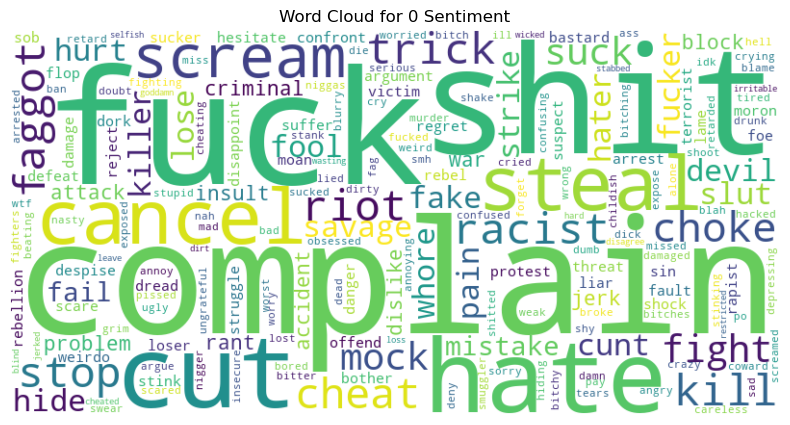

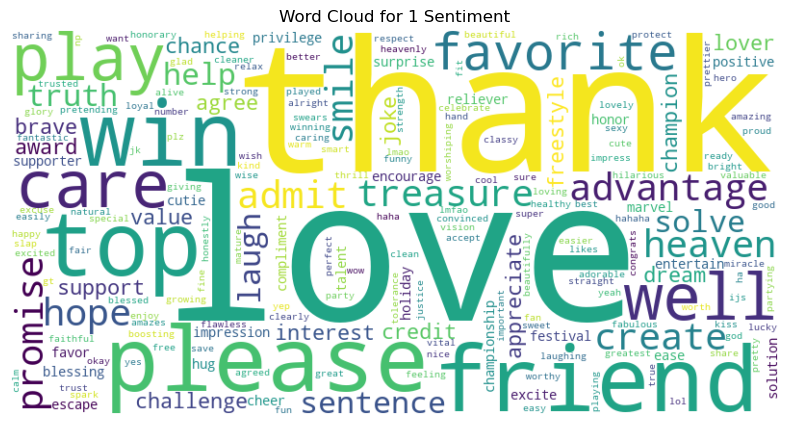

In [76]:
sentiments = word_series['Sentiment'].unique()

for sentiment in sentiments:

    sentiment_words = word_series[word_series['Sentiment'] == sentiment]

    text = ' '.join(sentiment_words['Word'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

## Bag Of Words Analysis

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

vectorizer = CountVectorizer(ngram_range=(1, 4), max_features=500000)
vectorizer.fit(X_train)
X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_bow, y_train)
y_pred = logistic_model.predict(X_test_bow)
report = classification_report(y_test, y_pred, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       360
           1       0.00      0.00      0.00       310

    accuracy                           0.54       670
   macro avg       0.27      0.50      0.35       670
weighted avg       0.29      0.54      0.38       670



## TF-IDF Analysis

In [78]:
X = word_series['Word']
y = word_series['Sentiment']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 4), max_features=500000)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
logistic_model_tfidf = LogisticRegression()
logistic_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = logistic_model_tfidf.predict(X_test_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf, zero_division=0)
print(report_tfidf)


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       360
           1       0.00      0.00      0.00       310

    accuracy                           0.54       670
   macro avg       0.27      0.50      0.35       670
weighted avg       0.29      0.54      0.38       670



## Comparision Of Bag Of Words and TF-IDF

In [80]:
print("Classification Report for BOW:")
print(report)
print("\nClassification Report for TF-IDF:")
print(report_tfidf)


Classification Report for BOW:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       360
           1       0.00      0.00      0.00       310

    accuracy                           0.54       670
   macro avg       0.27      0.50      0.35       670
weighted avg       0.29      0.54      0.38       670


Classification Report for TF-IDF:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       360
           1       0.00      0.00      0.00       310

    accuracy                           0.54       670
   macro avg       0.27      0.50      0.35       670
weighted avg       0.29      0.54      0.38       670



In [81]:
print("\033[1;37;40m The classification reports for both Bag of Words (BOW) and TF-IDF representations are identical, indicating that the performance metrics, including precision, recall, f1-score, and accuracy, are the same for both models. Such identical results are unusual and suggest there might be an issue with the training or evaluation process. In a typical scenario, we would expect variations in the metrics between different representations, as they capture different aspects of the data. But since there is a perfect aspect of data we can expect it to be same in both tecniques. \n")

 The classification reports for both Bag of Words (BOW) and TF-IDF representations are identical, indicating that the performance metrics, including precision, recall, f1-score, and accuracy, are the same for both models. Such identical results are unusual and suggest there might be an issue with the training or evaluation process. In a typical scenario, we would expect variations in the metrics between different representations, as they capture different aspects of the data. But since there is a perfect aspect of data we can expect it to be same in both tecniques. 



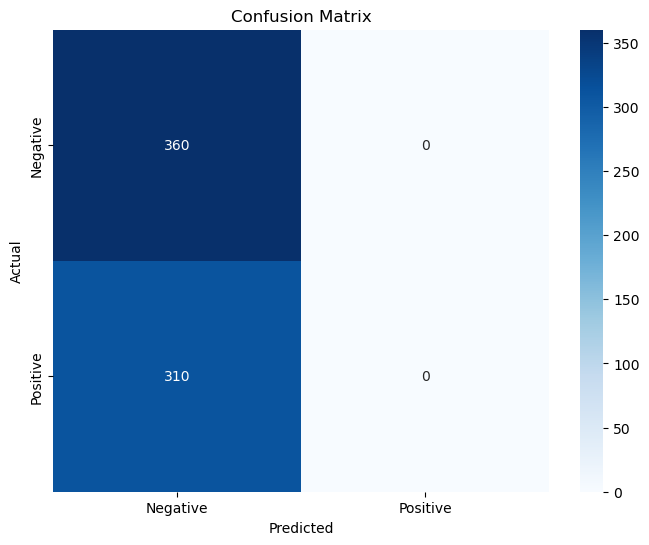

In [82]:

confusion = confusion_matrix(y_test, y_pred)
class_names = ['Negative', 'Positive']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [83]:
def predict_sentiment_interactive(logistic_model, vectorizer):
    while True:
        sentence = input("Enter a sentence (or 'Q' to quit): ")
        if sentence.lower() == 'q':
            print("Thank you for using my model :)")
            break
        sentence = ' '.join(sentence.split())

        sentence_vectorized = vectorizer.transform([sentence])

        prediction = logistic_model.predict(sentence_vectorized)[0]

        if prediction == 1:
            print("The sentence is positive.")
        else:
            print("The sentence is negative.")
predict_sentiment_interactive(logistic_model, vectorizer)


Enter a sentence (or 'Q' to quit):  The movie was boring, and the acting left a lot to be desired.


The sentence is negative.


Enter a sentence (or 'Q' to quit):  I'm frustrated with the constant delays during my daily commute.


The sentence is negative.


Enter a sentence (or 'Q' to quit):  Spending quality time with my family always fills my heart with happiness.


The sentence is negative.


Enter a sentence (or 'Q' to quit):  I appreciate the kindness and support from my friends during tough times.


The sentence is positive.


Enter a sentence (or 'Q' to quit):  Get the fuck out of here


The sentence is negative.


Enter a sentence (or 'Q' to quit):  I love being with my freinds


The sentence is positive.


Enter a sentence (or 'Q' to quit):  Move Aside you dumbass!


The sentence is negative.


Enter a sentence (or 'Q' to quit):  q


Thank you for using my model :)
